<a href="https://colab.research.google.com/github/WilliamMejiaG/sales-predictions/blob/main/Sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install category_encoders

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
import category_encoders as ce

# **Data screening**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CODING_DOJO/SALES_PREDICTIONS/sales_predictions.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
#Exploring data to find missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
#Creating the first filter to localte missing values in Item_Weight column feature
nan_filter_1 = df['Item_Weight'].isna()
df.loc[nan_filter_1,:]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [ ]:
#Counting on the number of missing values
df['Item_Weight'].isna().sum()

1463

In [ ]:
#Creating the second filter to localte missing values in Outlet_size column feature
nan_filter_2 = df['Outlet_Size'].isna()
df.loc[nan_filter_2,:]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [ ]:
#Counting the number of missing values
df['Outlet_Size'].isna().sum()

2410

In [ ]:
#Calculating the mean for the first imputation
mean_weight = df['Item_Weight'].mean()

In [ ]:
#Imputing the missing values of Item_Weight with its mean
df['Item_Weight'] = df.loc[:,'Item_Weight'].fillna(mean_weight)

In [ ]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
#Check the imputation
df['Item_Weight'].isna().sum()

0

In [ ]:
#Checking the most frequent categorical value
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
#Checking the order pandas outputs that value
most_frequent = df['Outlet_Size'].value_counts().index[0]
print(most_frequent)

Medium


In [ ]:
#Imputing the missing values of Outlet_size with the most frequent categorical value
df['Outlet_Size'] = df.loc[:,'Outlet_Size'].fillna(most_frequent)

In [ ]:
#Checking the imputation
df['Outlet_Size'].isna().sum()

0

In [ ]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
#Checking the imputation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['LF','low fat','reg'],['Low Fat','Low Fat','Regular'])

# **Data analysis**

In [ ]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [ ]:
# Percentage calculations
sum_by_outlet_size = df.groupby(['Outlet_Size','Outlet_Type'])['Item_Outlet_Sales'].sum()
sum_by_outlet_size

Outlet_Size  Outlet_Type      
High         Supermarket Type1    2.142664e+06
Medium       Grocery Store        1.883402e+05
             Supermarket Type1    6.388161e+06
             Supermarket Type2    1.851823e+06
             Supermarket Type3    3.453926e+06
Small        Grocery Store        1.796941e+05
             Supermarket Type1    4.386518e+06
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
# Percentage by Outlet Size
sum_by_outlet_size/sum_by_outlet_size.groupby(level=0).sum()

Outlet_Size  Outlet_Type      
High         Supermarket Type1    1.000000
Medium       Grocery Store        0.015851
             Supermarket Type1    0.537622
             Supermarket Type2    0.155848
             Supermarket Type3    0.290679
Small        Grocery Store        0.039353
             Supermarket Type1    0.960647
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
# Percentage by Outlet Type
sum_by_outlet_size/sum_by_outlet_size.groupby(level=1).sum()

Outlet_Size  Outlet_Type      
High         Supermarket Type1    0.165875
Medium       Grocery Store        0.511746
             Supermarket Type1    0.494541
             Supermarket Type2    1.000000
             Supermarket Type3    1.000000
Small        Grocery Store        0.488254
             Supermarket Type1    0.339584
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
df.pivot_table(index='Outlet_Size', columns = 'Outlet_Type', values = 'Item_Outlet_Sales',aggfunc = np.sum).fillna(0)

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0.0000,2.142664e+06,0.00,0.000000e+00
Medium,188340.1724,6.388161e+06,1851822.83,3.453926e+06
Small,179694.0936,4.386518e+06,0.00,0.000000e+00


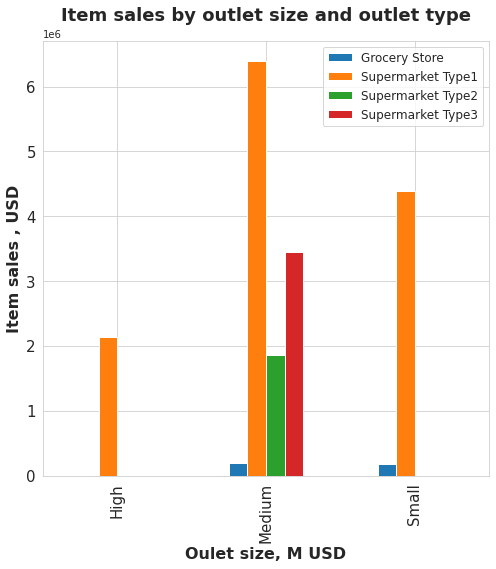

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8))
df.pivot_table(index='Outlet_Size', columns = 'Outlet_Type', values = 'Item_Outlet_Sales',aggfunc = np.sum).fillna(0).plot(kind = 'bar', ax = ax)
ax.set_title('Item sales by outlet size and outlet type', fontsize = 18, fontweight = 'bold', pad = 20)
ax.set_xlabel('Oulet size, M USD', fontsize = 16, fontweight = 'bold')
ax.set_ylabel('Item sales , USD', fontsize = 16, fontweight = 'bold')
ax.tick_params(axis='both', labelsize= 15)
ax.legend(fontsize = 12)
plt.show()

# Analyzing what item and how much money this item produce by Outlet Size and Outlet Type

# Outlet Size Medium and Outlet Type Supermarket Type 1

In [ ]:
out_size_1 = df['Outlet_Size']=='Medium'
out_type_1 = df['Outlet_Type']=='Supermarket Type1'
df1 = df.loc[out_size_1 & out_type_1,:]
df1.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
2,FDN15,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
8,FDH17,16.2,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.2,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350
10,FDY07,11.8,Low Fat,0.000000,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266


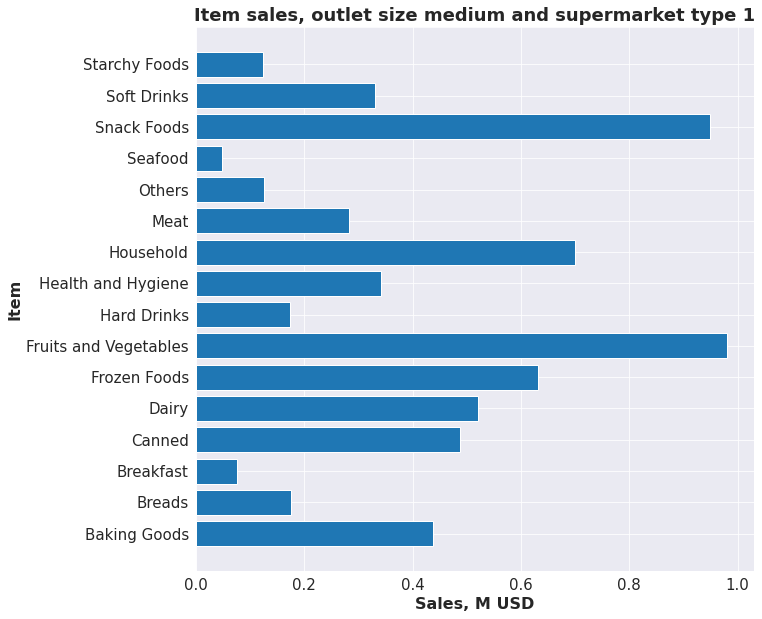

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,10))
ax.barh(df1.groupby(['Item_Type'])['Item_Outlet_Sales'].sum().index,df1.groupby(['Item_Type'])['Item_Outlet_Sales'].sum().apply(lambda x: x/1e6).values)
ax.set_title('Item sales, outlet size medium and supermarket type 1', fontsize = 18, fontweight = 'bold')
ax.set_xlabel('Sales, M USD', fontsize = 16, fontweight = 'bold')
ax.set_ylabel('Item', fontsize = 16, fontweight = 'bold')
ax.tick_params(axis='both', labelsize= 15)


# Outlet Size Medium and Outlet Type Supermarket Type 2, 3 and grocery store

In [ ]:
out_type_2 = df['Outlet_Type']=='Supermarket Type2'
df2 = df.loc[out_size_1 & out_type_2,:]
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
16,NCB42,11.800,Low Fat,0.008596,Health and Hygiene,115.3492,OUT018,2009,Medium,Tier 3,Supermarket Type2,1621.8888
31,NCS17,18.600,Low Fat,0.080829,Health and Hygiene,96.4436,OUT018,2009,Medium,Tier 3,Supermarket Type2,2741.7644
32,FDP33,18.700,Low Fat,0.000000,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064


In [ ]:
out_type_3 = df['Outlet_Type']=='Supermarket Type3'
df3 = df.loc[out_size_1 & out_type_3,:]
df3.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,12.857645,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,12.857645,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
36,FDV20,12.857645,Regular,0.059512,Fruits and Vegetables,128.0678,OUT027,1985,Medium,Tier 3,Supermarket Type3,2797.6916
38,FDX10,12.857645,Regular,0.123111,Snack Foods,36.9874,OUT027,1985,Medium,Tier 3,Supermarket Type3,388.1614


In [ ]:
out_type_4 = df['Outlet_Type']=='Grocery Store'
df4 = df.loc[out_size_1 & out_type_4,:]
df4.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,Medium,Tier 3,Grocery Store,178.4344
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,Medium,Tier 3,Grocery Store,163.7868
45,FDM39,6.420,Low Fat,0.089499,Dairy,178.1002,OUT010,1998,Medium,Tier 3,Grocery Store,358.2004
65,FDC46,17.700,Low Fat,0.195068,Snack Foods,185.4266,OUT010,1998,Medium,Tier 3,Grocery Store,184.4266


(0.0, 1.0)

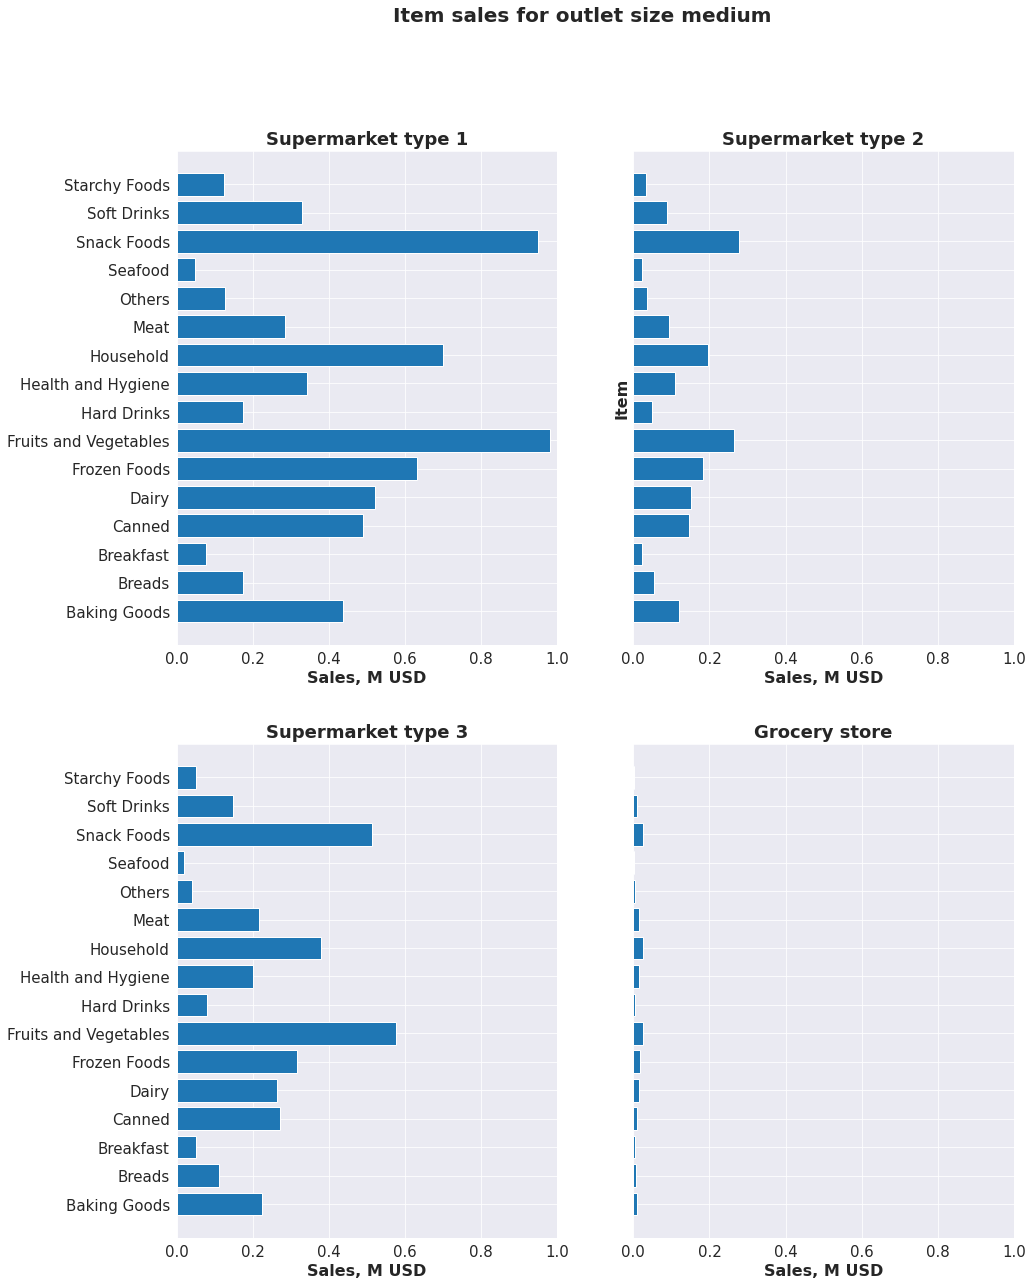

In [ ]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (15,20), sharey='row')
fig.suptitle('Item sales for outlet size medium', fontsize = 20, fontweight = 'bold')
ax[0][1].barh(df2.groupby(['Item_Type'])['Item_Outlet_Sales'].sum().index,df2.groupby(['Item_Type'])['Item_Outlet_Sales'].sum().apply(lambda x: x/1e6).values)
ax[0][1].set_title('Supermarket type 2', fontsize = 18, fontweight = 'bold')
ax[0][1].set_xlabel('Sales, M USD', fontsize = 16, fontweight = 'bold')
ax[0][1].set_ylabel('Item', fontsize = 16, fontweight = 'bold')
ax[0][1].tick_params(axis='both', labelsize= 15)
ax[0][1].set_xlim(0,1)

ax[0][0].barh(df1.groupby(['Item_Type'])['Item_Outlet_Sales'].sum().index,df1.groupby(['Item_Type'])['Item_Outlet_Sales'].sum().apply(lambda x: x/1e6).values)
ax[0][0].set_title('Supermarket type 1', fontsize = 18, fontweight = 'bold')
ax[0][0].set_xlabel('Sales, M USD', fontsize = 16, fontweight = 'bold')
ax[0][0].tick_params(axis='both', labelsize= 15)
ax[0][0].set_xlim(0,1)

ax[1][0].barh(df3.groupby(['Item_Type'])['Item_Outlet_Sales'].sum().index,df3.groupby(['Item_Type'])['Item_Outlet_Sales'].sum().apply(lambda x: x/1e6).values)
ax[1][0].set_title('Supermarket type 3', fontsize = 18, fontweight = 'bold')
ax[1][0].set_xlabel('Sales, M USD', fontsize = 16, fontweight = 'bold')
ax[1][0].tick_params(axis='both', labelsize= 15)
ax[1][0].set_xlim(0,1)

ax[1][1].barh(df4.groupby(['Item_Type'])['Item_Outlet_Sales'].sum().index,df4.groupby(['Item_Type'])['Item_Outlet_Sales'].sum().apply(lambda x: x/1e6).values)
ax[1][1].set_title('Grocery store', fontsize = 18, fontweight = 'bold')
ax[1][1].set_xlabel('Sales, M USD', fontsize = 16, fontweight = 'bold')
ax[1][1].tick_params(axis='both', labelsize= 15)
ax[1][1].set_xlim(0,1)

# Analysis with histograms, boxplots

## Histograms

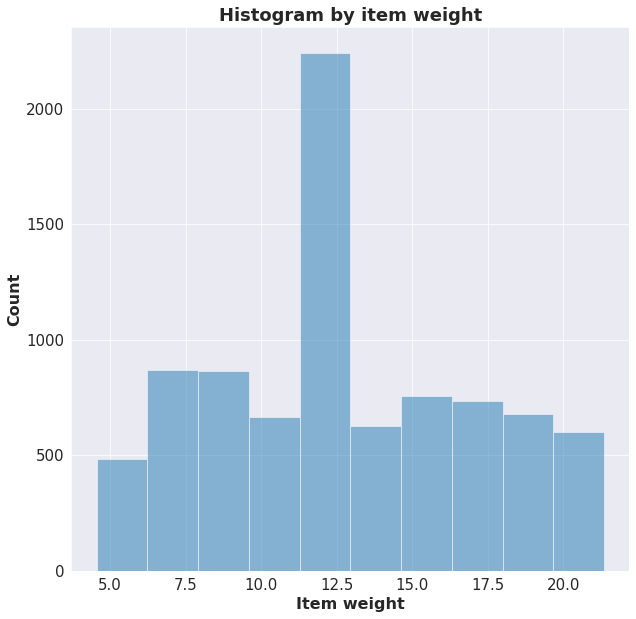

In [ ]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,10))
df['Item_Weight'].hist(ax=ax, alpha = 0.5)
ax.set_title('Histogram by item weight', fontsize = 18, fontweight = 'bold')
ax.set_xlabel('Item weight', fontsize = 16, fontweight = 'bold')
ax.set_ylabel('Count', fontsize = 16, fontweight = 'bold')
ax.tick_params(axis='both', labelsize= 15)

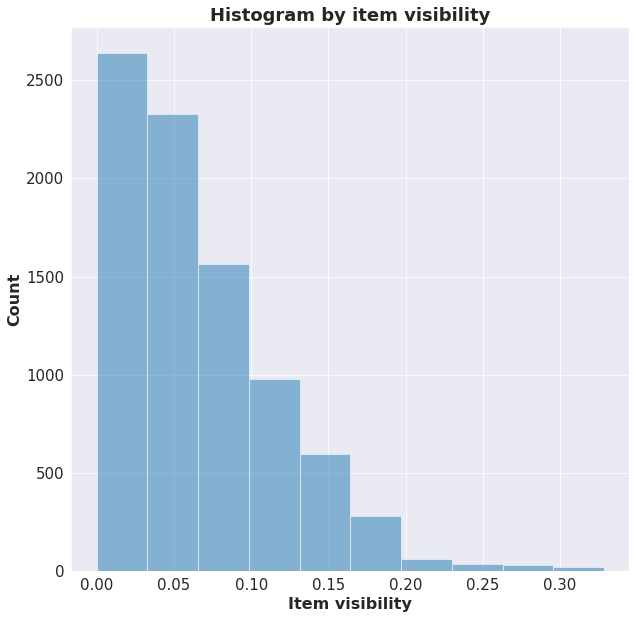

In [ ]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,10))
df['Item_Visibility'].hist(ax=ax, alpha = 0.5)
ax.set_title('Histogram by item visibility', fontsize = 18, fontweight = 'bold')
ax.set_xlabel('Item visibility', fontsize = 16, fontweight = 'bold')
ax.set_ylabel('Count', fontsize = 16, fontweight = 'bold')
ax.tick_params(axis='both', labelsize= 15)

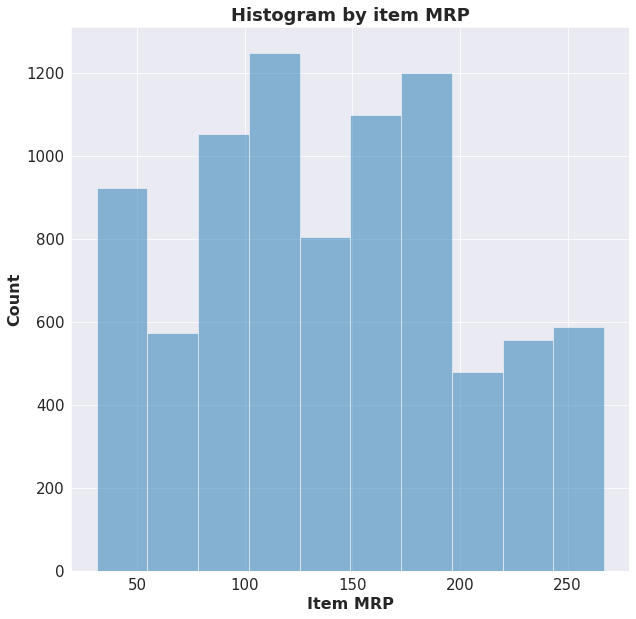

In [ ]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,10))
df['Item_MRP'].hist(ax=ax, alpha = 0.5)
ax.set_title('Histogram by item MRP', fontsize = 18, fontweight = 'bold')
ax.set_xlabel('Item MRP', fontsize = 16, fontweight = 'bold')
ax.set_ylabel('Count', fontsize = 16, fontweight = 'bold')
ax.tick_params(axis='both', labelsize= 15)

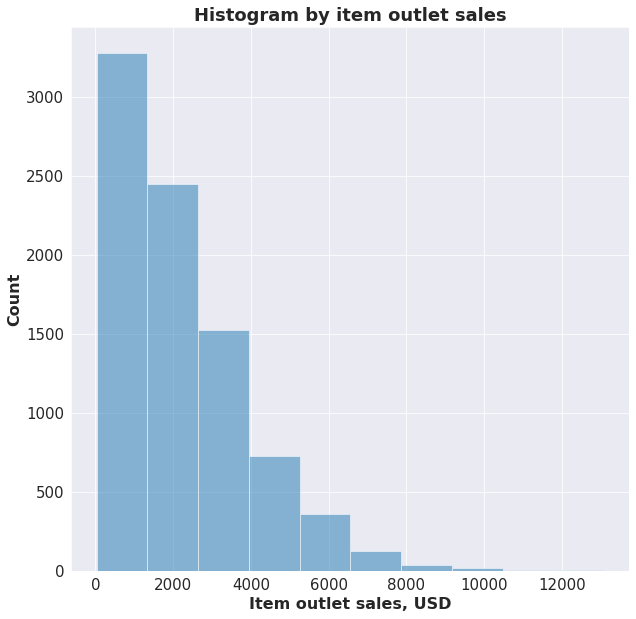

In [ ]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,10))
df['Item_Outlet_Sales'].hist(ax=ax, alpha = 0.5)
ax.set_title('Histogram by item outlet sales', fontsize = 18, fontweight = 'bold')
ax.set_xlabel('Item outlet sales, USD', fontsize = 16, fontweight = 'bold')
ax.set_ylabel('Count', fontsize = 16, fontweight = 'bold')
ax.tick_params(axis='both', labelsize= 15)

## Boxplots

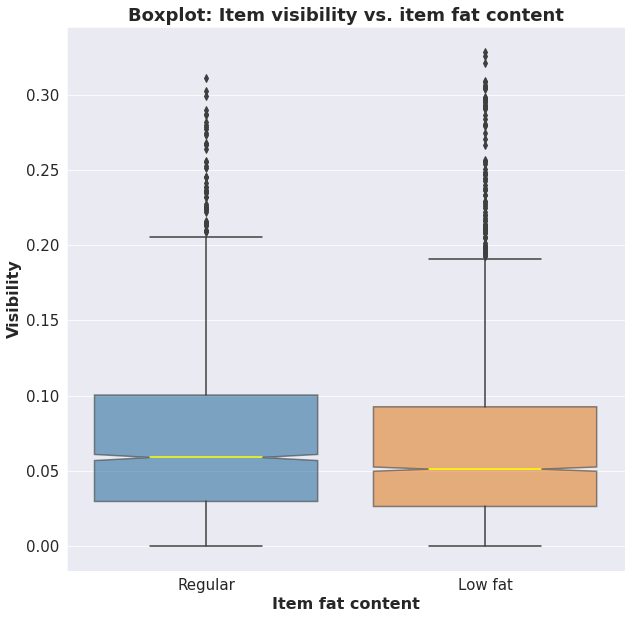

In [ ]:
regular = df.loc[df['Item_Fat_Content']=="Regular",'Item_Visibility'].values
low_fat = df.loc[df['Item_Fat_Content']=='Low Fat', 'Item_Visibility'].values
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,10))
sns.boxplot(data = [regular,low_fat],  boxprops=dict(alpha=.6), notch= True, medianprops={'color':'yellow'},ax=ax)
ax.set_title('Boxplot: Item visibility vs. item fat content', fontsize = 18, fontweight = 'bold')
ax.set_xlabel('Item fat content', fontsize = 16, fontweight = 'bold')
ax.set_xticklabels(['Regular','Low fat'], fontsize = 16)
ax.set_ylabel('Visibility', fontsize = 16, fontweight = 'bold')
ax.tick_params(axis='both', labelsize= 15)

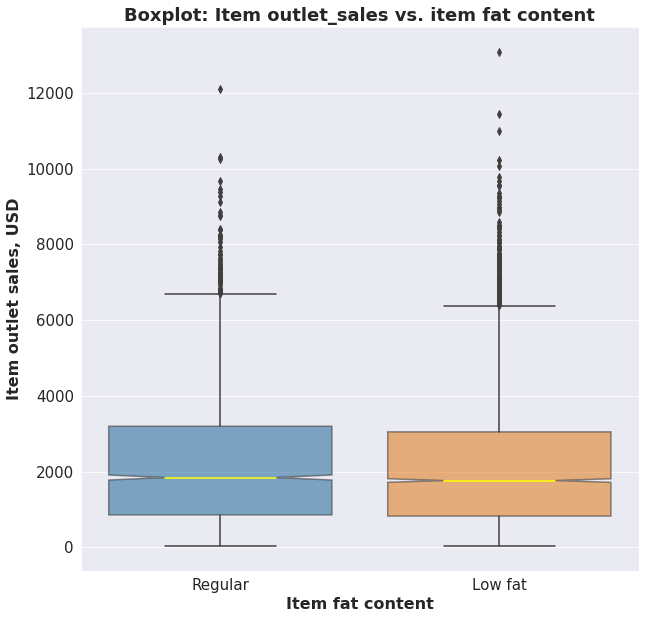

In [ ]:
regular = df.loc[df['Item_Fat_Content']=="Regular",'Item_Outlet_Sales'].values
low_fat = df.loc[df['Item_Fat_Content']=='Low Fat', 'Item_Outlet_Sales'].values
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,10))
sns.boxplot(data = [regular,low_fat],  boxprops=dict(alpha=.6), notch= True, medianprops={'color':'yellow'},ax=ax)
ax.set_title('Boxplot: Item outlet_sales vs. item fat content', fontsize = 18, fontweight = 'bold')
ax.set_xlabel('Item fat content', fontsize = 16, fontweight = 'bold')
ax.set_xticklabels(['Regular','Low fat'], fontsize = 16)
ax.set_ylabel('Item outlet sales, USD', fontsize = 16, fontweight = 'bold')
ax.tick_params(axis='both', labelsize= 15)

In [ ]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


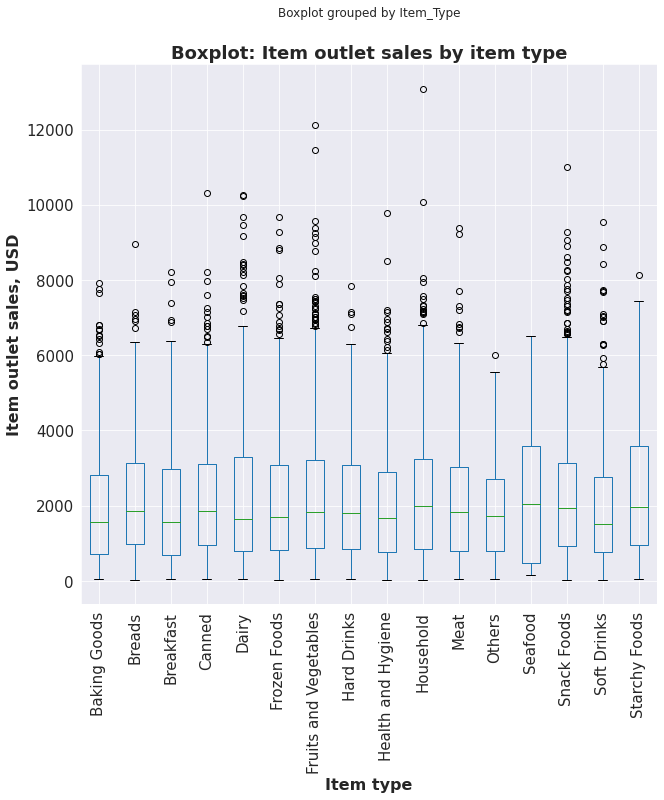

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,10))
df.boxplot(column = 'Item_Outlet_Sales', by = 'Item_Type', ax = ax)
ax.set_title('Boxplot: Item outlet sales by item type', fontsize = 18, fontweight = 'bold')
ax.set_xlabel('Item type', fontsize = 16, fontweight = 'bold')
plt.xticks(rotation = 90, fontsize = 16)
ax.set_ylabel('Item outlet sales, USD', fontsize = 16, fontweight = 'bold')
ax.tick_params(axis='both', labelsize= 15)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


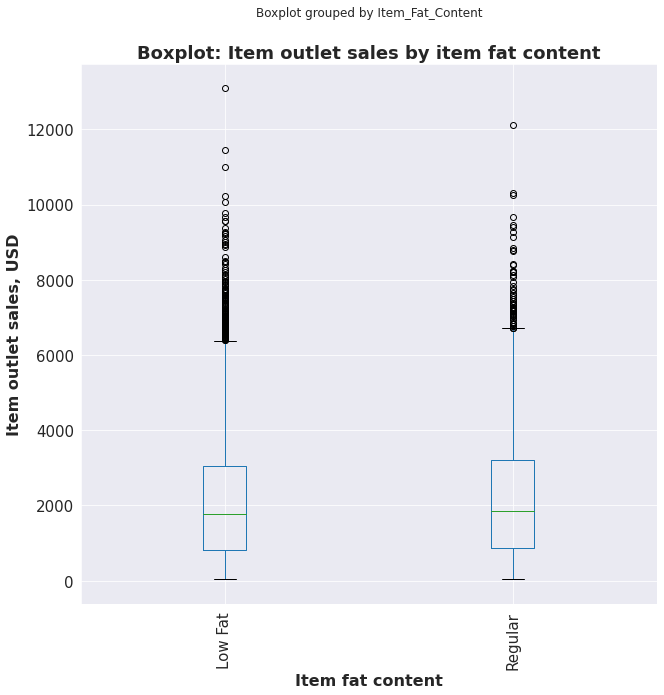

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,10))
df.boxplot(column = 'Item_Outlet_Sales', by = 'Item_Fat_Content', ax = ax)
ax.set_title('Boxplot: Item outlet sales by item fat content', fontsize = 18, fontweight = 'bold')
ax.set_xlabel('Item fat content', fontsize = 16, fontweight = 'bold')
plt.xticks(rotation = 90, fontsize = 16)
ax.set_ylabel('Item outlet sales, USD', fontsize = 16, fontweight = 'bold')
ax.tick_params(axis='both', labelsize= 15)

# Regression and classification analysis

## Feature matrix and target vector

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
# Feature matrix
X = df.loc[:,['Item_Identifier','Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']]

In [ ]:
X.shape

(8523, 11)

In [ ]:
y = df.loc[:,'Item_Outlet_Sales']

In [ ]:
y.shape

(8523,)

# Hot Encoding

In [ ]:
ohe = ce.OneHotEncoder(use_cat_names=True)

In [ ]:
X_ohe = ohe.fit_transform(X)

In [ ]:
X_ohe.head()

,Item_Identifier_FDA15,Item_Identifier_DRC01,Item_Identifier_FDN15,Item_Identifier_FDX07,Item_Identifier_NCD19,Item_Identifier_FDP36,Item_Identifier_FDO10,Item_Identifier_FDP10,Item_Identifier_FDH17,Item_Identifier_FDU28,Item_Identifier_FDY07,Item_Identifier_FDA03,Item_Identifier_FDX32,Item_Identifier_FDS46,Item_Identifier_FDF32,Item_Identifier_FDP49,Item_Identifier_NCB42,Item_Identifier_DRI11,Item_Identifier_FDU02,Item_Identifier_FDN22,Item_Identifier_FDW12,Item_Identifier_NCB30,Item_Identifier_FDC37,Item_Identifier_FDR28,Item_Identifier_NCD06,Item_Identifier_FDV10,Item_Identifier_DRJ59,Item_Identifier_FDE51,Item_Identifier_FDC14,Item_Identifier_FDV38,Item_Identifier_NCS17,Item_Identifier_FDP33,Item_Identifier_FDO23,Item_Identifier_DRH01,Item_Identifier_NCX29,Item_Identifier_FDV20,Item_Identifier_DRZ11,Item_Identifier_FDX10,Item_Identifier_FDB34,Item_Identifier_FDK43,...,Item_Fat_Content_Regular,Item_Visibility,Item_Type_Dairy,Item_Type_Soft Drinks,Item_Type_Meat,Item_Type_Fruits and Vegetables,Item_Type_Household,Item_Type_Baking Goods,Item_Type_Snack Foods,Item_Type_Frozen Foods,Item_Type_Breakfast,Item_Type_Health and Hygiene,Item_Type_Hard Drinks,Item_Type_Canned,Item_Type_Breads,Item_Type_Starchy Foods,Item_Type_Others,Item_Type_Seafood,Item_MRP,Outlet_Identifier_OUT049,Outlet_Identifier_OUT018,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT027,Outlet_Identifier_OUT045,Outlet_Identifier_OUT017,Outlet_Identifier_OUT046,Outlet_Identifier_OUT035,Outlet_Identifier_OUT019,Outlet_Establishment_Year,Outlet_Size_Medium,Outlet_Size_High,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 3,Outlet_Location_Type_Tier 2,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type3
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0.016047,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,249.8092,1,0,0,0,0,0,0,0,0,0,1999,1,0,0,1,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0.019278,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48.2692,0,1,0,0,0,0,0,0,0,0,2009,1,0,0,0,1,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0.016760,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,141.6180,1,0,0,0,0,0,0,0,0,0,1999,1,0,0,1,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,182.0950,0,0,1,0,0,0,0,0,0,0,1998,1,0,0,0,1,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,53.8614,0,0,0,1,0,0,0,0,0,0,1987,0,1,0,0,1,0,1,0,0,0


# Test and train data splitting

In [ ]:
X_train, X_test, y_train, y_test  = train_test_split(X_ohe, y, test_size=0.5, random_state=42)

#To_numpy conversion of data bases 

In [ ]:
X_train_a = X_train.to_numpy()

In [ ]:
X_train_a.shape

(4261, 1601)

In [ ]:
X_test_a = X_test.to_numpy()

In [ ]:
X_test_a.shape

(4262, 1601)

In [ ]:
y_train_a = y_train.to_numpy()

In [ ]:
y_train_a.shape

(4261,)

In [ ]:
y_test_a = y_test.to_numpy()

In [ ]:
y_test_a.shape

(4262,)

# Linear Regression

In [ ]:
# Linear regression instance
lm = LinearRegression()
lm.fit(X_train_a,y_train_a)
y_predicted_linear = lm.predict(X_test_a)

## Score of linear regression

In [ ]:
score_linear = lm.score(X_test_a, y_test_a)
score_linear

-1.2033165891065878e+17

It has no sense.

# k-NN regression

In [ ]:
# k-NN regression instance
knnr = KNeighborsRegressor()
knnr.fit(X_train_a,y_train_a)
y_predicted_knnr = knnr.predict(X_test_a)

## Score of k-NN regression

In [ ]:
score_knnr = knnr.score(X_test_a, y_test_a)
score_knnr

0.4560291109484369

k-NN regression outperform linear regression. 